PROJETO - SÉRIES TEMPORAIS

Entender a Tendência, Sazonalidade e Ruído

Exploração inicial
Decomposição
Testar se a série é estacionária (adfuller)
Fazer a diferenciação caso não seja estacionária
Graficos e autocorrelation  acf
Arima e Autoarima


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics import tsaplots
from functions import *

In [3]:
df = pd.read_csv("kalimati_tarkari_dataset.csv") 
df = df[df[commodity] == "Potato Red"]

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
0,0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5
1,1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0
2,2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5
3,3,Potato White,2013-06-16,Kg,15.0,16.0,15.5
4,4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0
...,...,...,...,...,...,...,...
197156,197156,Garlic Dry Nepali,2021-05-13,Kg,100.0,120.0,110.0
197157,197157,Fish Fresh(Rahu),2021-05-13,KG,270.0,280.0,275.0
197158,197158,Fish Fresh(Bachuwa),2021-05-13,KG,225.0,235.0,230.0
197159,197159,Fish Fresh(Chhadi),2021-05-13,KG,220.0,230.0,225.0


In [10]:
df['Commodity'].value_counts().head()

Commodity
Ginger                  2751
Cauli Local             2750
Cabbage(Local)          2749
Chilli Dry              2748
Raddish White(Local)    2747
                        ... 
Maize                     24
Mango(Calcutte)           23
Sweet Lime                14
Musk Melon                10
Mango(Chousa)              2
Name: count, Length: 132, dtype: int64

In [11]:
df = df[df['Commodity']=="Ginger"]
df

,SN,Commodity,Date,Unit,Minimum,Maximum,Average
63,63,Ginger,2013-06-16,Kg,140.0,150.0,145.0
136,136,Ginger,2013-06-17,Kg,140.0,150.0,145.0
209,209,Ginger,2013-06-18,Kg,140.0,150.0,145.0
282,282,Ginger,2013-06-19,Kg,140.0,150.0,145.0
356,356,Ginger,2013-06-20,Kg,140.0,150.0,145.0
...,...,...,...,...,...,...,...
196783,196783,Ginger,2021-05-09,Kg,60.0,80.0,70.0
196874,196874,Ginger,2021-05-10,Kg,70.0,80.0,75.0
196964,196964,Ginger,2021-05-11,Kg,70.0,80.0,75.0
197055,197055,Ginger,2021-05-12,Kg,90.0,100.0,95.0


In [15]:
df.loc[:,'Date'] = pd.to_datetime(df['Date'],  yearfirst= True)
df.set_index('Date', inplace=True)
df

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,SN,Commodity,Unit,Minimum,Maximum,Average
Date,,,,,,
2013-06-16,63,Ginger,Kg,140.0,150.0,145.0
2013-06-17,136,Ginger,Kg,140.0,150.0,145.0
2013-06-18,209,Ginger,Kg,140.0,150.0,145.0
2013-06-19,282,Ginger,Kg,140.0,150.0,145.0
2013-06-20,356,Ginger,Kg,140.0,150.0,145.0
...,...,...,...,...,...,...
2021-05-09,196783,Ginger,Kg,60.0,80.0,70.0
2021-05-10,196874,Ginger,Kg,70.0,80.0,75.0
2021-05-11,196964,Ginger,Kg,70.0,80.0,75.0


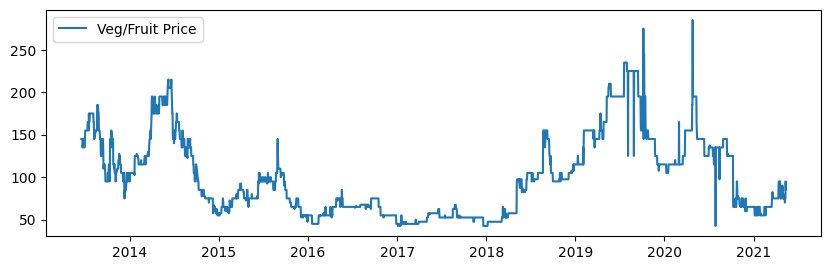

In [48]:
plt.figure(figsize=(10, 10))

# Primeiro subplot
plt.subplot(3, 1, 1)  # (linhas, colunas, índice)
plt.plot(df['Average'], label='Veg/Fruit Price')
plt.legend()

plt.show()



Captura por mês

Text(0.5, 0, 'Month')

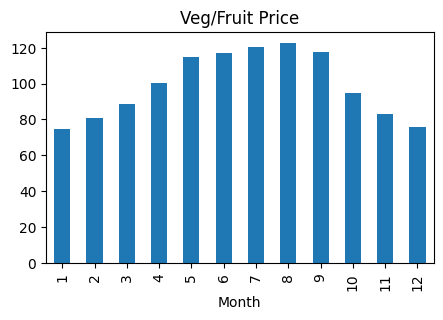

In [49]:
plt.figure(figsize=(5, 3))
df.Average.groupby(df.index.month).mean().plot(kind='bar')
plt.title('Veg/Fruit Price')
plt.xlabel('Month')




AUTOCORRELAÇÃO

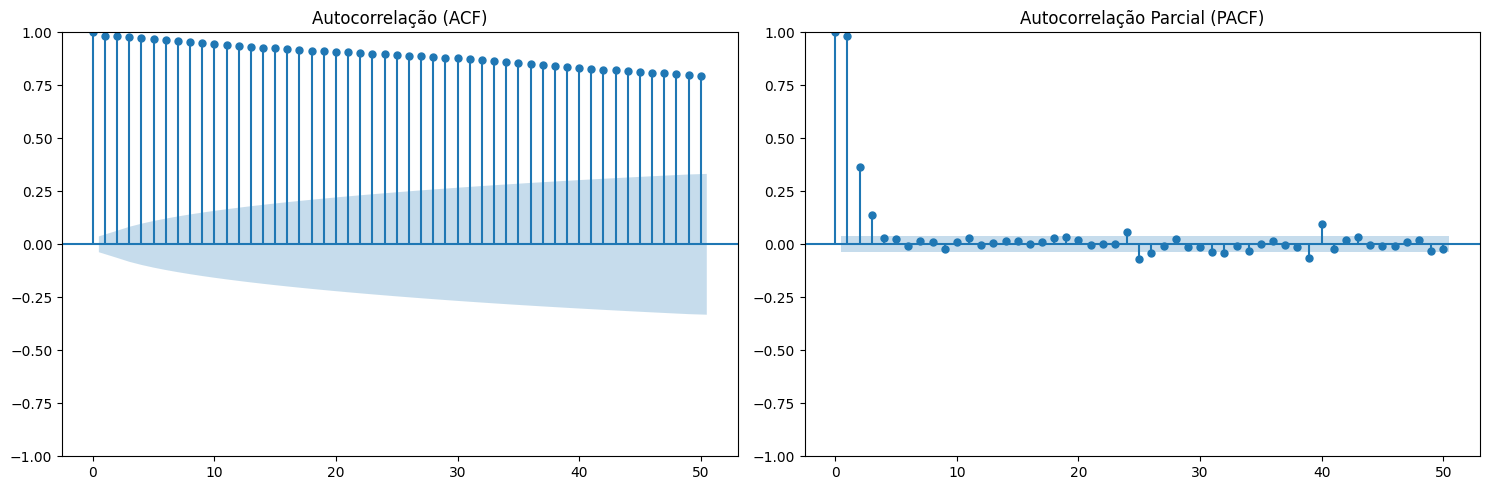

In [50]:
import statsmodels.graphics.tsaplots as tsaplots

# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotar o gráfico de autocorrelação (ACF) no primeiro subplot
tsaplots.plot_acf(df['Average'], lags=50, ax=ax1)
ax1.set_title('Autocorrelação (ACF)')

# Plotar o gráfico de autocorrelação parcial (PACF) no segundo subplot
tsaplots.plot_pacf(df['Average'], lags=50, ax=ax2)
ax2.set_title('Autocorrelação Parcial (PACF)')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

TESTANDO SE É ESTACIONARIO

Augmented Dickey-Fuller Test (ADF)

In [51]:
adf(df.Average)
KPSS(df.Average)


O dado não é estacionário
KPSS Statistic: 1.200331
p-value: 0.010000
Não estacionária


c:\Users\maria\Desktop\MeuGit\seriesTemporais\functions.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(x, regression='c')


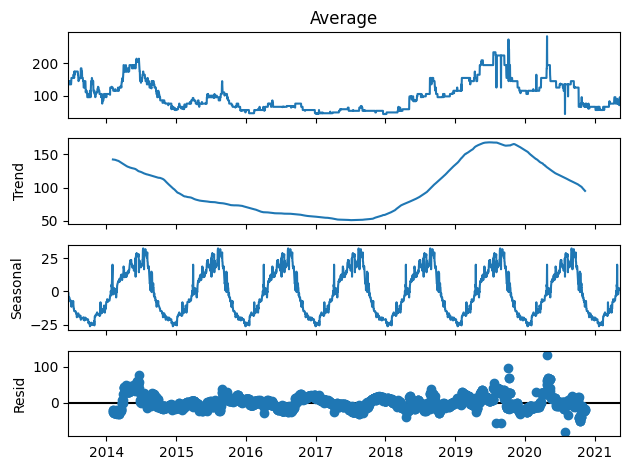

In [52]:
result = seasonal_decompose(df.Average, period=365)
result.plot()
plt.show()

DIFERENCIAÇÃO

C:\Users\maria\AppData\Local\Temp\ipykernel_10360\4014500405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vegDiff'] = df.Average.diff()


<Axes: xlabel='Date'>

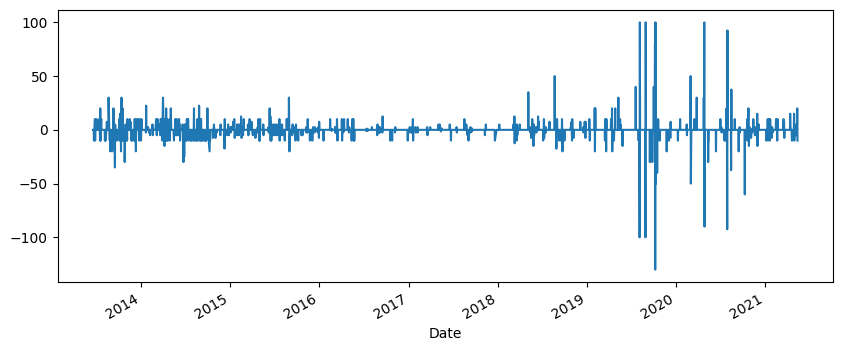

In [53]:
df['vegDiff'] = df.Average.diff()
plt.figure(figsize=(10, 4))
df['vegDiff'].plot()

In [54]:
adf(df['vegDiff'][1:])
KPSS(df['vegDiff'][1:])

O dado é estacionário, pvalue =  5.549909950914579e-21
KPSS Statistic: 0.059378
p-value: 0.100000
Estacionária


c:\Users\maria\Desktop\MeuGit\seriesTemporais\functions.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(x, regression='c')


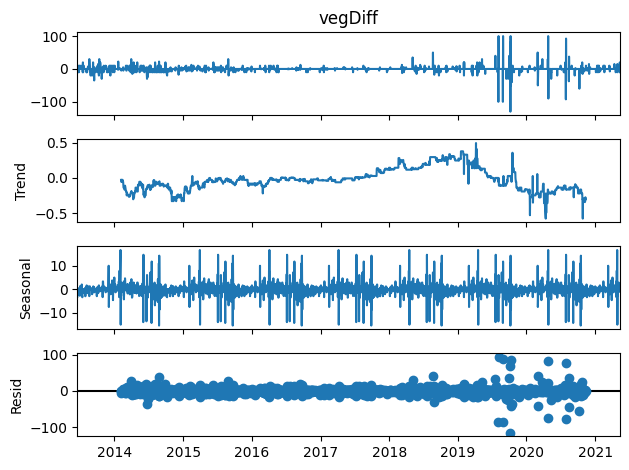

In [55]:
result = seasonal_decompose(df['vegDiff'][1:], period=365)
result.plot()
plt.show()

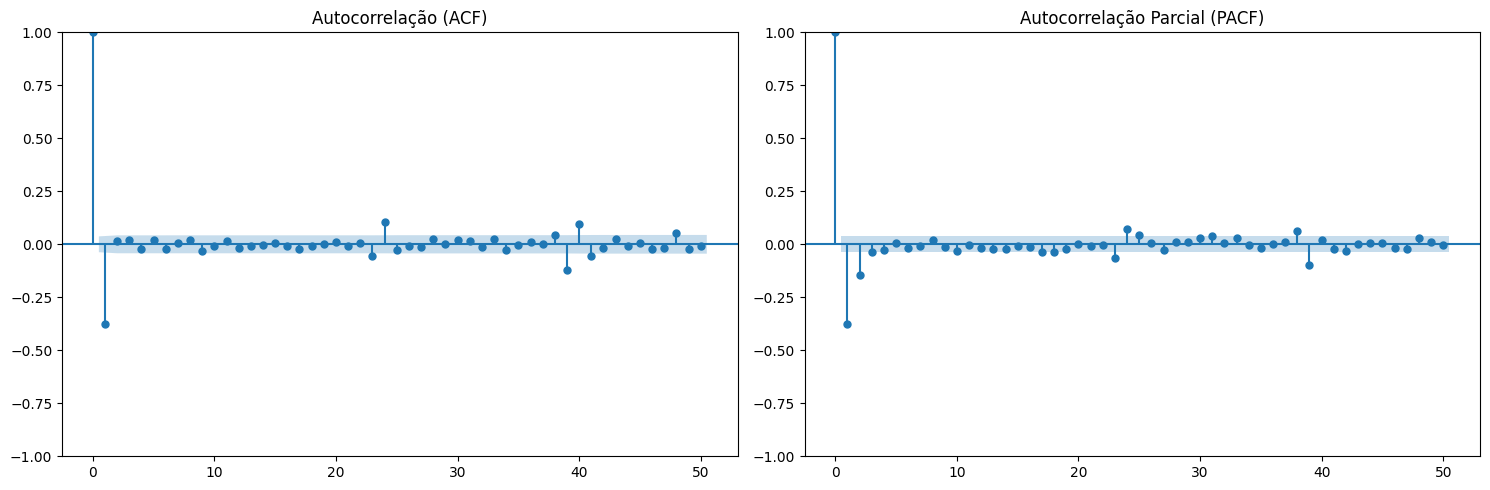

In [56]:
# Criar uma figura com dois subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plotar o gráfico de autocorrelação (ACF) no primeiro subplot
tsaplots.plot_acf(df['vegDiff'][1:], lags=50, ax=ax1)
ax1.set_title('Autocorrelação (ACF)')

# Plotar o gráfico de autocorrelação parcial (PACF) no segundo subplot
tsaplots.plot_pacf(df['vegDiff'][1:], lags=50, ax=ax2)
ax2.set_title('Autocorrelação Parcial (PACF)')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar os gráficos
plt.show()

DADO TRAIN E TEST

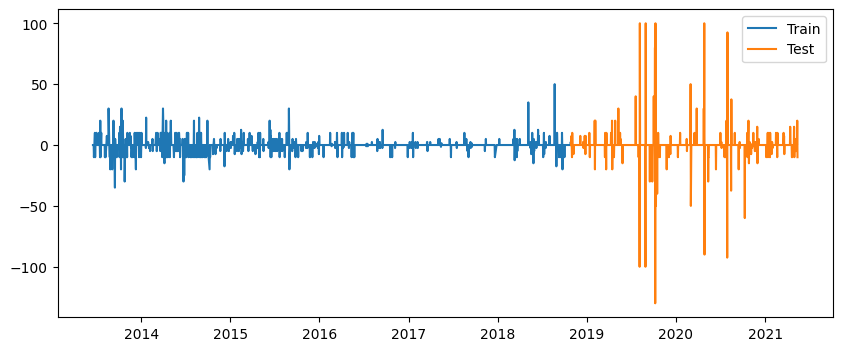

In [57]:
train_size = int(len(df.vegDiff)*2/3)
train_set = df.vegDiff[:train_size]
test_set = df.vegDiff[train_size:]
plt.figure(figsize=(10, 4))
plt.plot(train_set, label="Train")
plt.plot(test_set, label="Test")
plt.legend()

MODELO AUTOREGRESSIVO (AR) - LinearRegression

In [58]:
from sklearn.linear_model import LinearRegression

dfmodel = pd.DataFrame({'TrainVeg': train_set, 'naiveTrain': train_set.shift(1)}).dropna()
X = dfmodel[['naiveTrain']]
y = dfmodel[['TrainVeg']]

reg = LinearRegression().fit(X,y)
prediction = reg.predict(X)


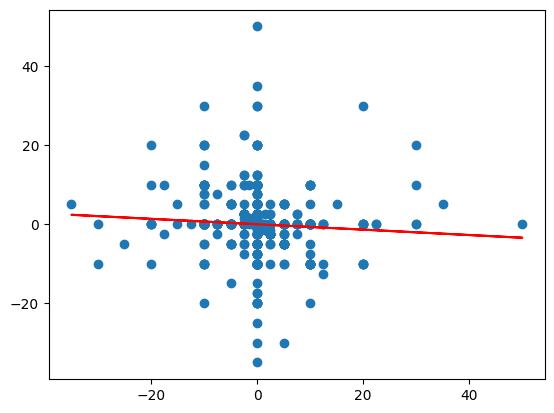

In [59]:
plt.scatter(X, y)
plt.plot(X, prediction, color='red')

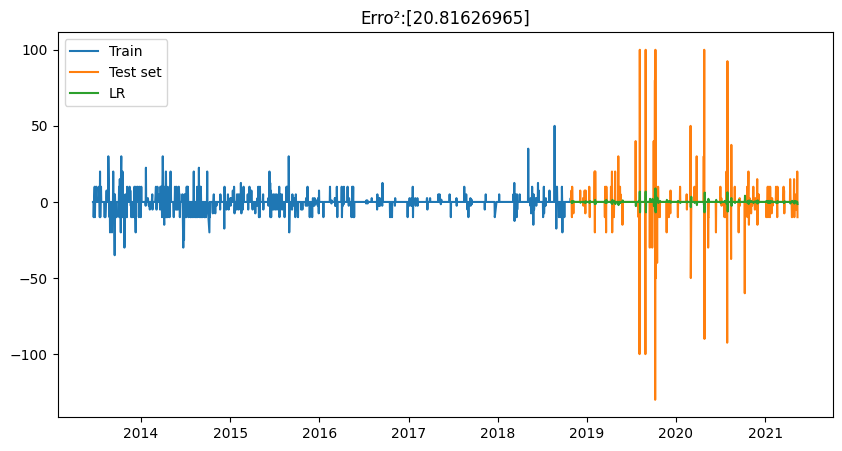

In [60]:
coef = reg.coef_[0][0]
pred_AR1 =  coef * test_set.shift(1)

erro = ((y-prediction)**2).mean()

plt.figure(figsize=(10, 5))
plt.plot(dfmodel['TrainVeg'], label="Train")
plt.plot(test_set, label='Test set')
plt.plot(pred_AR1, label="LR")
plt.title(f"Erro²:{erro.values}")
plt.legend()

plt.show()

AUTOREGRESSIVE A PARTIR DO statsmodel

In [64]:
train_size = int(len(df.Average)*2/3)
train_set = df.Average[:train_size]
test_set = df.Average[train_size:]
test_diff = test_set.diff(1)
dfmodel =  pd.DataFrame({'TrainVeg': train_set, 'TrainDiff':train_set.diff(1)}).dropna()

In [68]:
from statsmodels.tsa.ar_model import AutoReg 


dfmodel.index = pd.date_range(start=dfmodel['TrainDiff'].index[0], periods=len(dfmodel['TrainDiff']), freq='D')
ar1 = AutoReg(dfmodel['TrainDiff'], lags=1).fit()
dfmodel.index = pd.date_range(start=dfmodel['TrainDiff'].index[0], periods=len(dfmodel['TrainDiff']), freq='D')
ar2 = AutoReg(dfmodel['TrainDiff'], lags=2).fit()
prediction1 = ar1.predict()
prediction2 = ar2.predict()
ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              TrainDiff   No. Observations:                 1833
Model:                     AutoReg(2)   Log Likelihood               -5370.426
Method:               Conditional MLE   S.D. of innovations              4.545
Date:                Wed, 27 Mar 2024   AIC                          10748.852
Time:                        01:08:08   BIC                          10770.903
Sample:                    07-03-2013   HQIC                         10756.985
                         - 07-07-2018                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0303      0.106     -0.285      0.775      -0.239       0.178
TrainDiff.L1    -0.0744      0.023     -3.196      0.001      -0.120      -0.029
TrainDiff.L2    -0.0895      0.023     -3.846      0.000      -0.135      -0.044
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4155           -3.3163j            3.3422           -0.2698
AR.2           -0.4155           +3.3163j            3.3422            0.2698
-----------------------------------------------------------------------------
"""

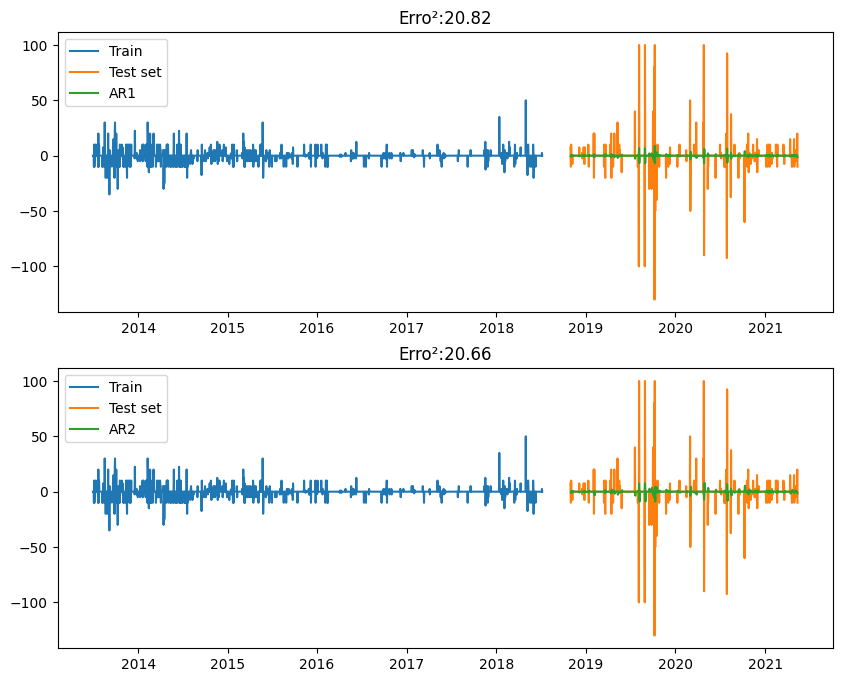

In [70]:
pred_AR1 = 0
for i, coef in enumerate(ar1.params[1:]):
    pred_AR1 +=  coef * test_diff.shift(i+1)
    
pred_AR2 = 0
for i, coef in enumerate(ar2.params[1:]):
    pred_AR2 +=  coef * test_diff.shift(i+1)
    
erro1 = round(((dfmodel.TrainDiff-prediction1)**2).mean(),2)
erro2 = round(((dfmodel.TrainDiff-prediction2)**2).mean(),2)

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)  # (linhas, colunas, índice)
plt.plot(dfmodel.TrainDiff, label="Train")
plt.plot(test_diff, label='Test set')
plt.plot(pred_AR1, label="AR1")
plt.title(f"Erro²:{erro1}")
plt.legend()

plt.subplot(2, 1, 2)  # (linhas, colunas, índice)
plt.plot(dfmodel.TrainDiff, label="Train")
plt.plot(test_diff, label='Test set')
plt.plot(pred_AR2, label="AR2")
plt.title(f"Erro²:{erro2}")
plt.legend()


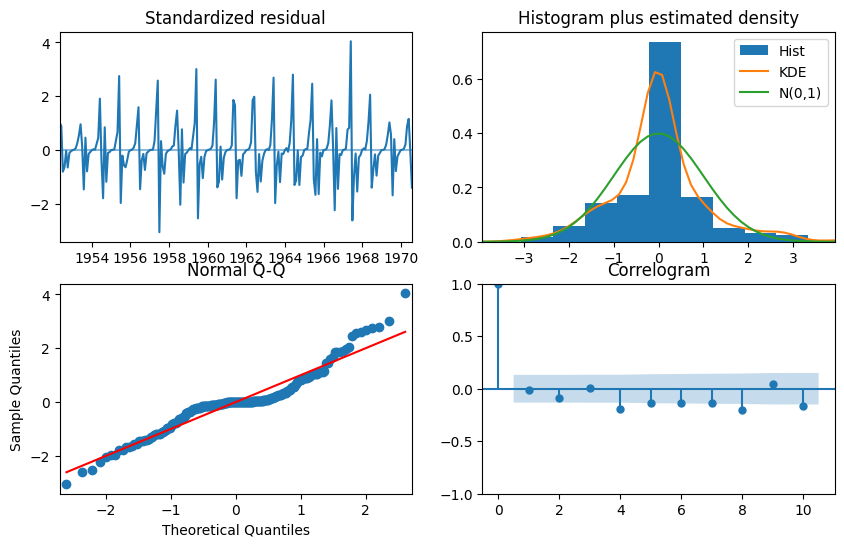

In [400]:
ar2.plot_diagnostics(figsize=(10,6));


#ARIMA
AR(p) = Efeito do momentum na série
I = integrated: uso das diferenças das informações
MA(p) = Efeito do ruído na série
p = periodos

In [401]:
from statsmodels.tsa.arima.model import ARIMA


arima_train = ARIMA(train_set,  order = (2,1,2)).fit()
arima = ARIMA(test_set, freq='MS', order = (2,1,2)).fit(arima_train.params)
pred_arima = arima.predict()
#arma.summary()


c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


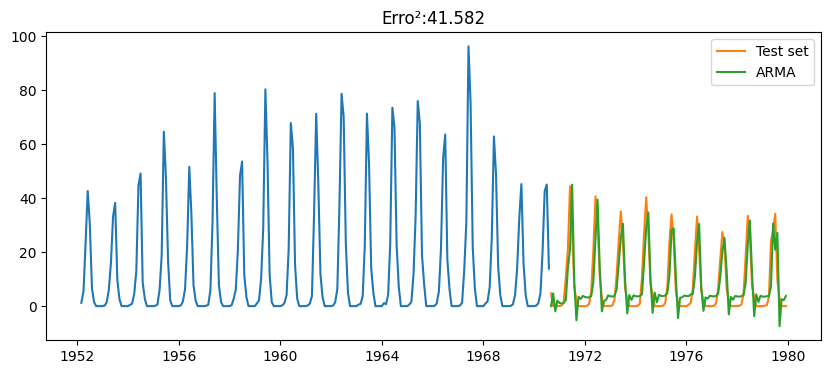

In [402]:
erro = round(((test_set - pred_arima)**2).mean(),3)
plt.figure(figsize=(10, 4))
plt.plot(dfmodel['TrainTrout'])
plt.plot(test_set, label='Test set')
plt.plot(pred_arima, label="ARMA")
plt.title(f"Erro²:{erro}")
plt.legend()

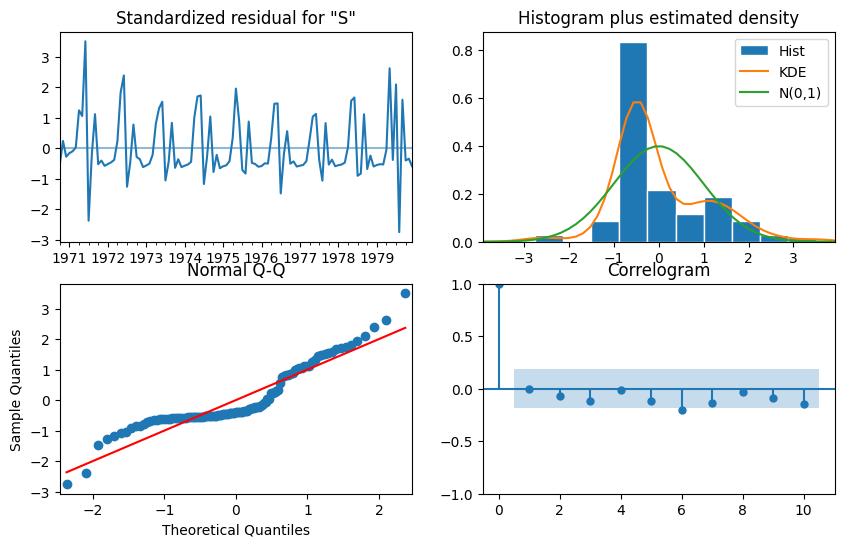

In [403]:
arima.plot_diagnostics(figsize=(10,6));


SARIMA

In [404]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_train = SARIMAX(train_set, order = (2, 1, 2), seasonal_order = (2,1,2,12)).fit()
sarima = SARIMAX(test_set, order = (2, 1, 2), seasonal_order = (2,1,2,12)).fit(sarima_train.params)

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs

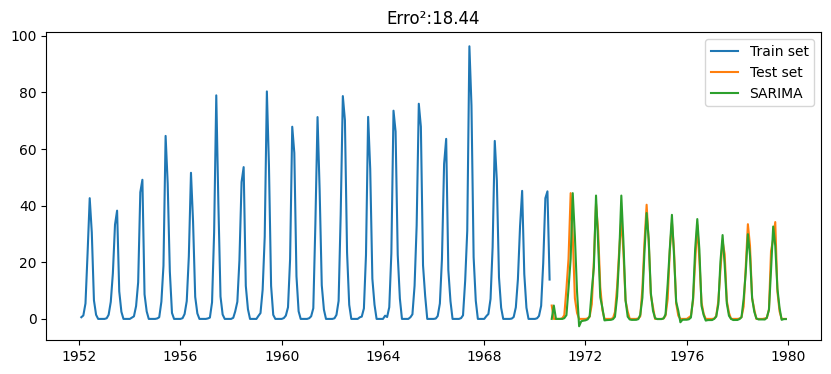

In [405]:
erro = round((sarima.resid**2).mean(),3)
plt.figure(figsize=(10, 4))
plt.plot(train_set, label='Train set')
plt.plot(test_set, label='Test set')
plt.plot(sarima.predict(typ='levels'), label="SARIMA")
plt.title(f"Erro²:{erro}")
plt.legend()


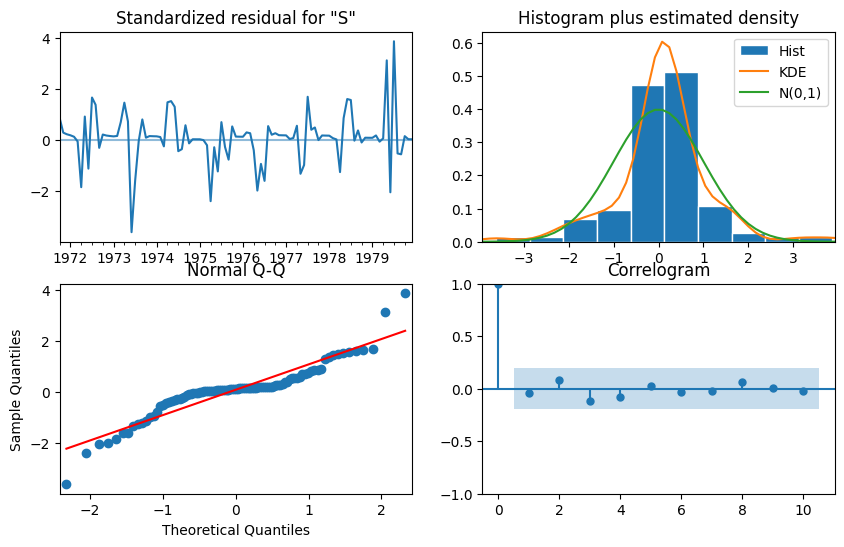

In [406]:
sarima.plot_diagnostics(figsize=(10,6));

AUTOARIMA

In [407]:
from pmdarima import auto_arima
import pandas as pd

# Suponha que você tenha um DataFrame df com a série temporal que deseja modelar
# e a série esteja na coluna 'serie_temporal'

# Ajustar o modelo AutoARIMA
modelo_autoarima = auto_arima(df.SeaTrout, seasonal=True, m=12, D=0)

# Resumo do modelo
print(modelo_autoarima.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  335
Model:             SARIMAX(3, 0, 2)x(2, 0, [1], 12)   Log Likelihood               -1020.940
Date:                              Wed, 27 Mar 2024   AIC                           2061.879
Time:                                      00:30:17   BIC                           2100.020
Sample:                                  02-01-1952   HQIC                          2077.085
                                       - 12-01-1979                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6010      0.670      0.896      0.370      -0.713       1.915
ar.L1         -1.31

In [408]:
modelo_autoarima.fit(train_set)

ARIMA(order=(3, 0, 2), scoring_args={}, seasonal_order=(2, 0, 1, 12),
      suppress_warnings=True)

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\maria\AppData\Local\Programs

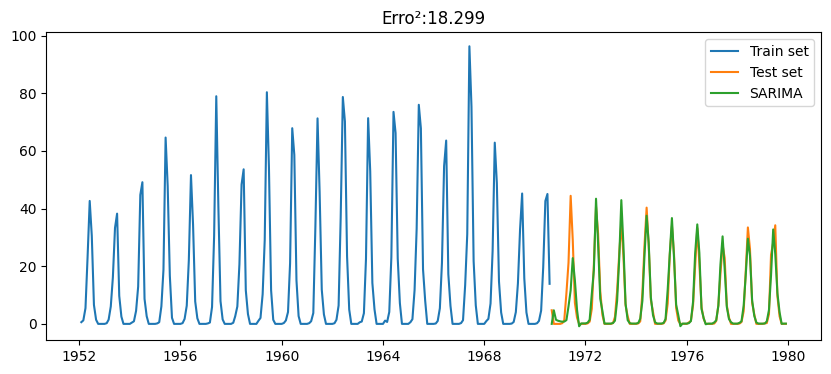

In [409]:
sarima_train = SARIMAX(train_set, order = (1, 1, 1), seasonal_order = (2,0,2,12)).fit()
sarima_auto = SARIMAX(test_set, order = (1, 1, 1), seasonal_order = (2,0,2,12)).fit(sarima_train.params)
erro = round((sarima_auto.resid**2).mean(),3)
plt.figure(figsize=(10, 4))
plt.plot(train_set, label='Train set')
plt.plot(test_set, label='Test set')
plt.plot(sarima_auto.predict(typ='levels'), label="SARIMA")
plt.title(f"Erro²:{erro}")
plt.legend()


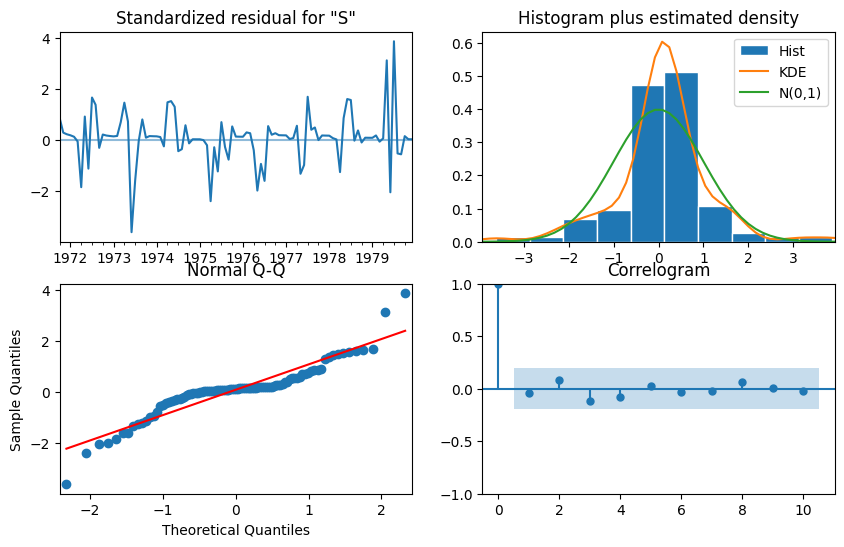

In [410]:
sarima.plot_diagnostics(figsize=(10,6));

PREVISÕES FUTURAS - FORECAST

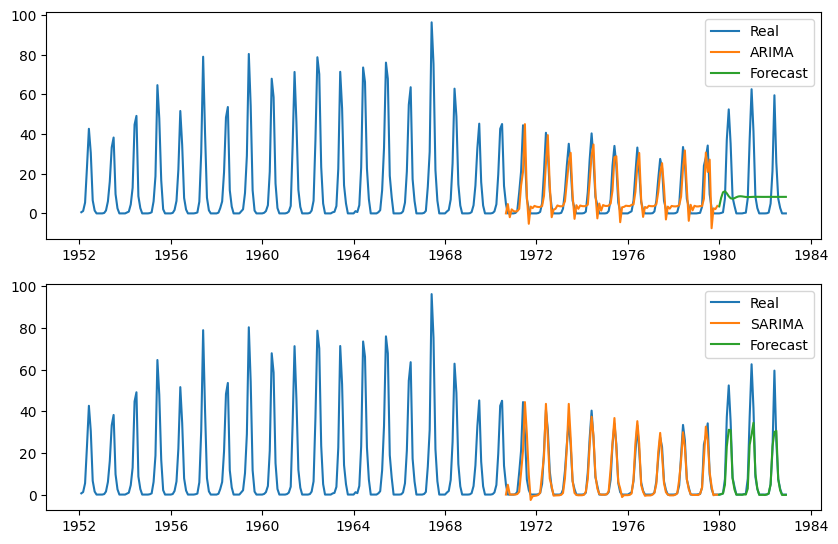

In [418]:
# Fazer previsões para os próximos 'n' períodos
n = 36  # Defina o número de períodos futuros para prever
forecastArima = arima.forecast(steps=n)
forecastSarima = sarima.forecast(steps=n)

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)  # (linhas, colunas, índice)
plt.plot(df0.SeaTrout, label='Real')
plt.plot(arima.predict(typ='levels'), label="ARIMA")
plt.plot(forecastArima, label="Forecast")
plt.legend()                

plt.subplot(3, 1, 2)  # (linhas, colunas, índice)
plt.plot(df0.SeaTrout, label='Real')
plt.plot(sarima.predict(typ='levels'), label="SARIMA")
plt.plot(forecastSarima, label="Forecast")
plt.legend()   

#plt.subplot(3, 1, 3)  # (linhas, colunas, índice)

plt.legend()                  

OUTRAS CORRELAÇÕES

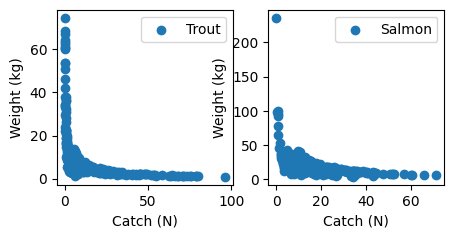

In [412]:
plt.figure(figsize=(5, 5))

# Primeiro subplot
plt.subplot(2, 2, 1)  # (linhas, colunas, índice)
troutW = df['SeaTroutWeight']/df['SeaTrout']
plt.scatter(df['SeaTrout'],troutW,  label='Trout')
plt.xlabel('Catch (N)')
plt.ylabel('Weight (kg)')
plt.legend()

plt.subplot(2, 2, 2)  # (linhas, colunas, índice)
salmonW = df['SalmonWeight']/df['Salmon']
plt.scatter(df['Salmon'],salmonW, label='Salmon')
plt.xlabel('Catch (N)')
plt.ylabel('Weight (kg)')
plt.legend()

plt.show()

In [413]:
df1 = df1[['Salmon','SalmonWeight','SeaTrout','SeaTroutWeight','Farmed']]
df1

,Salmon,SalmonWeight,SeaTrout,SeaTroutWeight,Farmed
Datas,,,,,
1952-02-01,26.733,145.730283,0.598,9.544724,0.0
1952-03-01,24.493,184.315819,1.219,23.048463,0.0
1952-04-01,34.886,290.013496,5.460,42.206117,0.0
1952-05-01,41.166,392.583903,23.067,77.572104,0.0
1952-06-01,36.096,423.018922,42.653,80.644748,0.0
...,...,...,...,...,...
2022-05-01,0.059,14.500144,0.206,7.871677,0.0
2022-06-01,0.194,16.881553,0.599,8.536784,0.0
2022-07-01,0.246,18.965385,0.322,8.999110,0.0


Como a sazonalidade das outras variáveis afetam a sazonalidade da Truta e do Salmão

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


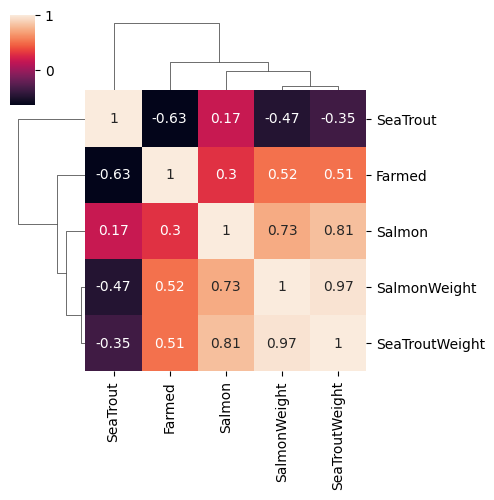

In [414]:
import statsmodels.api as sm
from matplotlib import rcParams

seasonality_dict = {}

seasonality_dict = {
    ts: sm.tsa.seasonal_decompose(df1[ts], period=12).seasonal for ts in df1.columns
}

# Compute corr matrix
seasonality_corr = pd.DataFrame(seasonality_dict).corr()

sns.clustermap(seasonality_corr, annot=True, square=True, figsize=(5, 5))


Correlação da TENDÊNCIA

c:\Users\maria\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


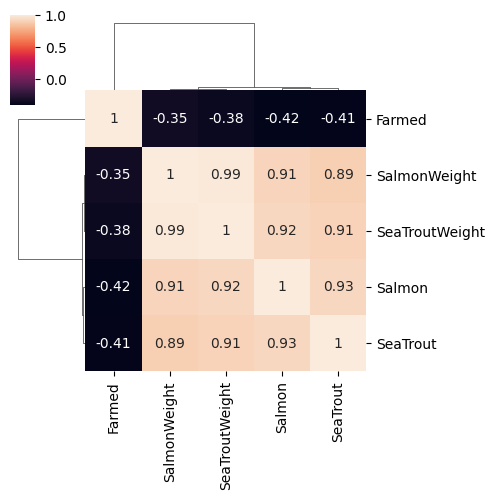

In [415]:
trend_dict = {}
trend_dict = {
    ts: sm.tsa.seasonal_decompose(df1[ts], period=12).trend for ts in df1.columns
}

# Compute corr matrix
trend_dict = pd.DataFrame(trend_dict).corr()

sns.clustermap(trend_dict, annot=True, square=True, figsize=(5, 5))
plt.show();